In [26]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '9681211b-4578-404a-824c-8ea4d7a3c2b4',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-03-21T22:46:25.972Z', 'error_code': 0, 'error_message': None, 'elapsed': 49, 'credit_count': 1, 'notice': None, 'total_count': 9063}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10099, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [27]:
type(data)

dict

In [28]:
import pandas as pd

#See all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [29]:
#Normalizing the data

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('today')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10099,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19324137.00000,19324137.00000,NaN,1,NaN,NaN,None,2023-03-21T22:45:00.000Z,27988.10959,36456903704.45622,-19.22270,-0.10460,-0.35964,13.27299,14.18413,23.83238,66.82857,540846064134.51453,46.02150,587750301440.35999,None,2023-03-21T22:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 22:46:36.911247
1,1027,Ethereum,ETH,ethereum,6597,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,None,2023-03-21T22:45:00.000Z,1788.17786,10934958045.42289,-0.34490,-0.10447,1.81179,4.87926,6.10706,8.31833,47.67976,218826238719.39978,18.62690,218826238719.39999,None,2023-03-21T22:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 22:46:36.911247
2,825,Tether,USDT,tether,49830,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,76856420219.05283,80091735571.99397,NaN,3,NaN,NaN,None,2023-03-21T22:45:00.000Z,1.00092,50405026911.61113,-7.55480,0.04648,-0.11729,-0.19543,0.06787,0.07196,0.08749,76927447703.99577,6.54820,80165752999.89999,None,2023-03-21T22:45:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-21 22:46:36.911247
3,1839,BNB,BNB,bnb,1218,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,157890691.40818,159979963.59043,NaN,4,NaN,NaN,None,2023-03-21T22:45:00.000Z,335.57603,638526671.39029,-6.46250,-0.35691,-0.47909,8.36088,7.20709,10.41542,36.02719,52984330810.04141,4.51010,53685440466.79000,None,2023-03-21T22:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 22:46:36.911247
4,3408,USD Coin,USDC,usd-coin,11054,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,35289631770.06458,35289631770.06458,NaN,5,NaN,NaN,None,2023-03-21T22:45:00.000Z,0.99784,5154491644.92208,-23.44120,0.02823,-0.05269,-0.09185,-0.19659,-0.22631,-0.21250,35213547917.10378,2.99620,35213547917.10000,None,2023-03-21T22:45:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-21 22:46:36.911247
5,52,XRP,XRP,xrp,906,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50950912949.00000,99989113908.00000,NaN,6,NaN,NaN,None,2023-03-21T22:45:00.000Z,0.46028,3994930498.64671,272.50970,-1.25483,21.89009,23.01423,18.74119,12.01731,33.03518,23451715498.62965,1.99630,46028057479.76000,None,2023-03-21T22:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 22:46:36.911247
6,2010,Cardano,ADA,cardano,709,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34719181431.35000,35591462141.75800,NaN,7,NaN,NaN,None,2023-03-21T22:45:00.000Z,0.36781,671989281.51590,108.79240,-0.96447,9.75698,6.90866,-8.55375,2.37317,46.31973,12770004808.93880,1.08700,16551375715.42000,None,2023-03-21T22:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 22:46:36.911247
7,74,Dogecoin,DOGE,dogecoin,663,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,132670764299.89409,132670764299.89409,NaN,8,NaN,NaN,None,2023-03-21T22:45:00.000Z,0.07620,627870075.44713,53.74520,-0.31988,5.95273,2.20821,-12.57051,-11.56071,4.12261,10110034153.88241,0.86030,10110034153.88000,None,2023-03-21T22:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 22:46:36.911247
8,3890,Poly

In [40]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '9681211b-4578-404a-824c-8ea4d7a3c2b4',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('today')
    df
    
    if not os.path.isfile(r'C:\Users\aegir\Desktop\MITx\Python scripts\API10.csv'):
        df.to_csv(r'C:\Users\aegir\Desktop\MITx\Python scripts\API10.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\aegir\Desktop\MITx\Python scripts\API10.csv', mode='a', header=False)

In [13]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed')
    sleep(60) #Wait for 60sek
exit()

API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed


KeyboardInterrupt: 

In [46]:
df = pd.read_csv(r'C:\Users\aegir\Desktop\MITx\Python scripts\API10.csv')
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10099,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19324043.00000,19324043.00000,NaN,1,NaN,NaN,NaN,2023-03-21T22:06:00.000Z,28040.70252,36419226966.07699,-19.54410,-0.20660,0.17894,14.29766,14.28872,25.57720,66.97635,541859741324.17169,46.00390,588854753004.19995,NaN,2023-03-21T22:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 22:07:36.027933
1,1,1027,Ethereum,ETH,ethereum,6597,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,NaN,2023-03-21T22:06:00.000Z,1794.19453,10921722785.78506,-0.85790,-0.26037,2.22355,5.57047,6.42989,9.51298,48.04155,219562520908.96439,18.64250,219562520908.95999,NaN,2023-03-21T22:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 22:07:36.027933
2,2,825,Tether,USDT,tether,49827,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,76856420219.05283,80091735571.99397,NaN,3,NaN,NaN,NaN,2023-03-21T22:06:00.000Z,1.00097,50293197291.56390,-8.02000,0.07182,-0.04718,-0.16556,0.06965,0.07597,0.09152,76930626591.42091,6.53200,80169065704.42000,NaN,2023-03-21T22:06:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-21 22:07:36.027933
3,3,1839,BNB,BNB,bnb,1218,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,157890705.12470,159979963.59043,NaN,4,NaN,NaN,NaN,2023-03-21T22:06:00.000Z,336.74345,636812957.00561,-6.21400,-0.28679,0.43363,9.44697,7.49198,11.31910,36.28520,53168660180.71011,4.51440,53872204276.65000,NaN,2023-03-21T22:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 22:07:36.027933
4,4,3408,USD Coin,USDC,usd-coin,11054,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,35289490658.01458,35289490658.01458,NaN,5,NaN,NaN,NaN,2023-03-21T22:06:00.000Z,0.99785,5179113945.70440,-22.87170,0.06614,0.01330,-0.07920,-0.20793,-0.24651,-0.21428,35213594195.92336,2.98760,35213594195.92000,NaN,2023-03-21T22:06:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-21 22:07:36.027933
5,5,52,XRP,XRP,xrp,906,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,50950912949.00000,99989113908.00000,NaN,6,NaN,NaN,NaN,2023-03-21T22:06:00.000Z,0.47053,3861749637.13088,259.31210,-3.57811,24.59508,26.13871,21.03598,14.60831,36.09792,23973949170.75002,2.03560,47053031600.72000,NaN,2023-03-21T22:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 22:07:36.027933
6,6,2010,Cardano,ADA,cardano,709,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34719183649.74600,35591462141.75800,NaN,7,NaN,NaN,NaN,2023-03-21T22:06:00.000Z,0.37343,652428765.88957,102.99080,-1.88390,11.56131,9.14011,-7.24599,5.77378,48.40529,12965255917.64852,1.10080,16804442240.92000,NaN,2023-03-21T22:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 22:07:36.027933
7,7,74,Dogecoin,DOGE,dogecoin,663,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,132670764299.89407,132670764299.89407,NaN,8,NaN,NaN,NaN,2023-03-21T22:06:00.000Z,0.07648,619139251.48669,50.50930,-1.09026,6.26720,3.16568,-12.31231,-10.56062,4.29361,10146100153.61889,0.86140,10146100153.62000,NaN,2023-03-21T22:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 22:07:36.027933
8,

In [47]:
#I noticed the scientific notation and want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [48]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10099,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19324043.00000,19324043.00000,NaN,1,NaN,NaN,NaN,2023-03-21T22:06:00.000Z,28040.70252,36419226966.07699,-19.54410,-0.20660,0.17894,14.29766,14.28872,25.57720,66.97635,541859741324.17169,46.00390,588854753004.19995,NaN,2023-03-21T22:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 22:07:36.027933
1,1,1027,Ethereum,ETH,ethereum,6597,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,NaN,2023-03-21T22:06:00.000Z,1794.19453,10921722785.78506,-0.85790,-0.26037,2.22355,5.57047,6.42989,9.51298,48.04155,219562520908.96439,18.64250,219562520908.95999,NaN,2023-03-21T22:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 22:07:36.027933
2,2,825,Tether,USDT,tether,49827,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,76856420219.05283,80091735571.99397,NaN,3,NaN,NaN,NaN,2023-03-21T22:06:00.000Z,1.00097,50293197291.56390,-8.02000,0.07182,-0.04718,-0.16556,0.06965,0.07597,0.09152,76930626591.42091,6.53200,80169065704.42000,NaN,2023-03-21T22:06:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-21 22:07:36.027933
3,3,1839,BNB,BNB,bnb,1218,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,157890705.12470,159979963.59043,NaN,4,NaN,NaN,NaN,2023-03-21T22:06:00.000Z,336.74345,636812957.00561,-6.21400,-0.28679,0.43363,9.44697,7.49198,11.31910,36.28520,53168660180.71011,4.51440,53872204276.65000,NaN,2023-03-21T22:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 22:07:36.027933
4,4,3408,USD Coin,USDC,usd-coin,11054,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,35289490658.01458,35289490658.01458,NaN,5,NaN,NaN,NaN,2023-03-21T22:06:00.000Z,0.99785,5179113945.70440,-22.87170,0.06614,0.01330,-0.07920,-0.20793,-0.24651,-0.21428,35213594195.92336,2.98760,35213594195.92000,NaN,2023-03-21T22:06:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-21 22:07:36.027933
5,5,52,XRP,XRP,xrp,906,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,50950912949.00000,99989113908.00000,NaN,6,NaN,NaN,NaN,2023-03-21T22:06:00.000Z,0.47053,3861749637.13088,259.31210,-3.57811,24.59508,26.13871,21.03598,14.60831,36.09792,23973949170.75002,2.03560,47053031600.72000,NaN,2023-03-21T22:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 22:07:36.027933
6,6,2010,Cardano,ADA,cardano,709,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34719183649.74600,35591462141.75800,NaN,7,NaN,NaN,NaN,2023-03-21T22:06:00.000Z,0.37343,652428765.88957,102.99080,-1.88390,11.56131,9.14011,-7.24599,5.77378,48.40529,12965255917.64852,1.10080,16804442240.92000,NaN,2023-03-21T22:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 22:07:36.027933
7,7,74,Dogecoin,DOGE,dogecoin,663,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,132670764299.89407,132670764299.89407,NaN,8,NaN,NaN,NaN,2023-03-21T22:06:00.000Z,0.07648,619139251.48669,50.50930,-1.09026,6.26720,3.16568,-12.31231,-10.56062,4.29361,10146100153.61889,0.86140,10146100153.62000,NaN,2023-03-21T22:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 22:07:36.027933
8,

In [8]:
df = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.13222,0.23165,14.38786,14.37977,25.56893,67.08118
Ethereum,-0.18291,2.30809,5.67616,6.51972,9.55622,48.14938
Tether,0.03296,-0.08898,-0.21627,0.04677,0.05558,0.06937
BNB,-0.27028,0.32324,9.50785,7.51372,11.28240,36.33899
USD Coin,0.02902,-0.02237,-0.09081,-0.22865,-0.25881,-0.23360
XRP,-3.58278,24.46420,26.09331,20.95322,14.44002,36.00344
Cardano,-2.30404,11.40509,9.06688,-7.31898,4.90098,48.24630
Dogecoin,-1.12455,6.22753,3.19757,-12.30663,-10.63422,4.33764
Polygon,-0.03848,2.13226,-2.50262,-23.36798,13.27255,45.09097


In [9]:
df = df.stack()
df

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.13222
             quote.USD.percent_change_24h     0.23165
             quote.USD.percent_change_7d     14.38786
             quote.USD.percent_change_30d    14.37977
             quote.USD.percent_change_60d    25.56893
             quote.USD.percent_change_90d    67.08118
Ethereum     quote.USD.percent_change_1h     -0.18291
             quote.USD.percent_change_24h     2.30809
             quote.USD.percent_change_7d      5.67616
             quote.USD.percent_change_30d     6.51972
             quote.USD.percent_change_60d     9.55622
             quote.USD.percent_change_90d    48.14938
Tether       quote.USD.percent_change_1h      0.03296
             quote.USD.percent_change_24h    -0.08898
             quote.USD.percent_change_7d     -0.21627
             quote.USD.percent_change_30d     0.04677
             quote.USD.percent_change_60d     0.05558
             quote.USD.percent_change_90

In [10]:
type(df)

pandas.core.series.Series

In [11]:
df = df.to_frame(name='values')
df

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.13222
            quote.USD.percent_change_24h   0.23165
            quote.USD.percent_change_7d   14.38786
            quote.USD.percent_change_30d  14.37977
            quote.USD.percent_change_60d  25.56893
            quote.USD.percent_change_90d  67.08118
Ethereum    quote.USD.percent_change_1h   -0.18291
            quote.USD.percent_change_24h   2.30809
            quote.USD.percent_change_7d    5.67616
            quote.USD.percent_change_30d   6.51972
            quote.USD.percent_change_60d   9.55622
            quote.USD.percent_change_90d  48.14938
Tether      quote.USD.percent_change_1h    0.03296
            quote.USD.percent_change_24h  -0.08898
            quote.USD.percent_change_7d   -0.21627
            quote.USD.percent_change_30d   0.04677
            quote.USD.percent_change_60d   0.05558
            quote.USD.percent_change_90d   0.06937
BNB         quote.USD.percent_change_1h   -0.27028
            quote.USD.percent_change_24h   0.32324
            quote.USD.percent_change_7d    9.50785
            quote.USD.percent_change_30d   7.51372
            quote.USD.percent_change_60d  11.28240
            quote.USD.percent_change_90d  36.33899
USD Coin    quote.USD.percent_change_1h    0.02902
            quote.USD.percent_change_24h  -0.02237
            quote.USD.percent_change_7d   -0.09081
            quote.USD.percent_change_30d  -0.22865
            quote.USD.percent_change_60d  -0.25881
            quote.USD.percent_change_90d  -0.23360
XRP         quote.USD.percent_change_1h   -3.58278
            quote.USD.percent_change_24h  24.46420
            quote.USD.percent_change_7d   26.09331
            quote.USD.percent_change_30d  20.95322
            quote.USD.percent_change_60d  14.44002
            quote.USD.percent_change_90d  36.00344
Cardano     quote.USD.percent_change_1h   -2.30404
            quote.USD.percent_change_24h  11.40509
            quote.USD.percent_change_7d    9.06688
            quote.USD.percent_change_30d  -7.31898
            quote.USD.percent_change_60d   4.90098
            quote.USD.percent_change_90d  48.24630
Dogecoin    quote.USD.percent_change_1h   -1.12455
            quote.USD.percent_change_24h   6.22753
            quote.USD.percent_change_7d    3.19757
            quote.USD.percent_change_30d -12.30663
            quote.USD.percent_change_60d -10.63422
            quote.USD.percent_change_90d   4.33764
Polygon     quote.USD.percent_change_1h   -0.03848
            quote.USD.percent_change_24h   2.13226
            quote.USD.percent_change_7d   -2.50262
            quote.USD.percent_change_30d -23.36798
            quote.USD.percent_change_60d  13.27255
            quote.USD.percent_change_90d  45.09097
Solana      quote.USD.percent_change_1h   -0.09843
            quote.USD.percent_change_24h  -0.24320
            quote.USD.percent_change_7d    8.76013
            quote.USD.percent_change_30d -10.16584
            quote.USD.percent_change_60d  -8.59424
            quote.USD.percent_change_90d  87.12356
Binance USD quote.USD.percent_change_1h    0.01153
            quote.USD.percent_change_24h  -0.06916
            quote.USD.percent_change_7d   -0.05696
            quote.USD.percent_change_30d  -0.13763
            quote.USD.percent_change_60d  -0.13096
            quote.USD.percent_change_90d  -0.11230
Polkadot    quote.USD.percent_change_1h   -0.29461
            quote.USD.percent_change_24h   3.32671
            quote.USD.percent_change_7d    2.82611
            quote.USD.percent_change_30d -15.35641
            quote.USD.percent_change_60d   3.30713
            quote.USD.percent_change_90d  42.42042
Shiba Inu   quote.USD.percent_change_1h   -0.43114
            quote.USD.percent_change_24h   3.47652
            quote.USD.percent_change_7d   -1.98268
            quote.USD.percent_change_30d -18.81614
            quote.USD.percent_change_60d  -9.50791
            quo

In [12]:
df.count()

values    90
dtype: int64

In [13]:
index = pd.Index(range(90))

df = df.reset_index()
df

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.13222
1,Bitcoin,quote.USD.percent_change_24h,0.23165
2,Bitcoin,quote.USD.percent_change_7d,14.38786
3,Bitcoin,quote.USD.percent_change_30d,14.37977
4,Bitcoin,quote.USD.percent_change_60d,25.56893
5,Bitcoin,quote.USD.percent_change_90d,67.08118
6,Ethereum,quote.USD.percent_change_1h,-0.18291
7,Ethereum,quote.USD.percent_change_24h,2.30809
8,Ethereum,quote.USD.percent_change_7d,5.67616
9,Ethereum,quote.USD.percent_change_30d,6.51972


In [14]:
df = df.rename(columns={'level_1':'percent_change'})
df

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.13222
1,Bitcoin,quote.USD.percent_change_24h,0.23165
2,Bitcoin,quote.USD.percent_change_7d,14.38786
3,Bitcoin,quote.USD.percent_change_30d,14.37977
4,Bitcoin,quote.USD.percent_change_60d,25.56893
5,Bitcoin,quote.USD.percent_change_90d,67.08118
6,Ethereum,quote.USD.percent_change_1h,-0.18291
7,Ethereum,quote.USD.percent_change_24h,2.30809
8,Ethereum,quote.USD.percent_change_7d,5.67616
9,Ethereum,quote.USD.percent_change_30d,6.51972


In [15]:
df['percent_change'] = df['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df

,name,percent_change,values
0,Bitcoin,1h,-0.13222
1,Bitcoin,24h,0.23165
2,Bitcoin,7d,14.38786
3,Bitcoin,30d,14.37977
4,Bitcoin,60d,25.56893
5,Bitcoin,90d,67.08118
6,Ethereum,1h,-0.18291
7,Ethereum,24h,2.30809
8,Ethereum,7d,5.67616
9,Ethereum,30d,6.51972


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

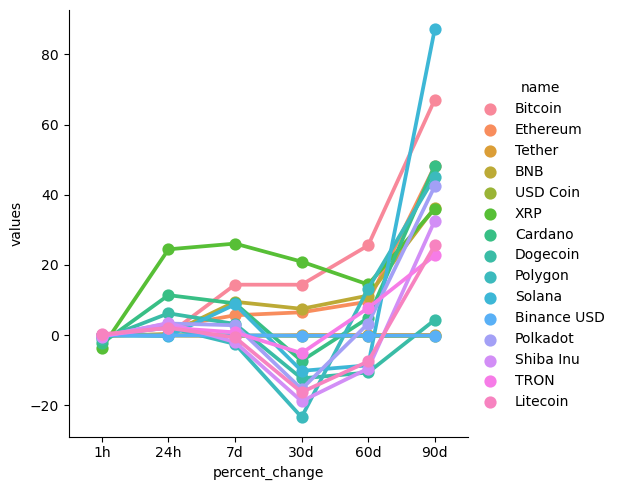

In [17]:
sns.catplot(x='percent_change', y='values', hue='name', data=df, kind='point')

In [49]:
df10 = df[['name', 'quote.USD.price', 'timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,28040.70252,2023-03-21 22:07:36.027933
15,Bitcoin,28048.95027,2023-03-21 22:08:36.403090
30,Bitcoin,28071.18464,2023-03-21 22:09:37.600564
45,Bitcoin,28064.08433,2023-03-21 22:10:37.990722


In [50]:
sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)

<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>